<a href="https://colab.research.google.com/github/ddrraaccaarriiss/Cramer/blob/master/letter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Мы попробовали несколько моделей для распознавания кыргызских букв в рукописных текстах на киргизском языке (Kyrgyz MNIST), чтобы обучить искусственный интеллект. Этот проект был проведен The Cramer Project (thecramer.com) на  [Kaggle](https://www.kaggle.com/competitions/kyrgyz-language-hand-written-letter-recognition)

In [ ]:
# import libraries
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import neural_network
from xgboost import XGBRegressor
from sklearn import ensemble
import catboost as cb
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Загрузка данных
sub = pd.read_csv('/kaggle/input/kyrgyz-language-hand-written-letter-recognition/submission_sample.csv')
test = pd.read_csv('/kaggle/input/kyrgyz-language-hand-written-letter-recognition/test.csv')
df = pd.read_csv('/kaggle/input/kyrgyz-language-hand-written-letter-recognition/train.csv')


In [3]:
# split to x and y
X = df.iloc[:, 1:].values
Y = df.iloc[:, 0].values

In [1]:
# check indexes of letters
print(f'index of first letter: {y.min()}')
print(f'index of last letter: {y.max()}')

In [9]:
# decrement indexes so they start at 0
Y -= 1

In [2]:
# check max and min value of pixel
print(f'max value of pixel: {X.max()}')
print(f'min value of pixel: {X.min()}')

In [ ]:
alphabet = {0: 'а', 1: 'б', 2: 'в', 3: 'г', 4: 'д', 5: 'е', 6: 'ё', 7: 'ж', 8: 'з', 9: 'и', 10: 'й',
          11: 'к', 12: 'л', 13: 'м', 14: 'н', 15: 'ң', 16: 'о', 17: 'ө', 18: 'п', 19: 'р', 20: 'с',
          21: 'т', 22: 'у', 23: 'ү', 24: 'ф', 25: 'х', 26: 'ц', 27: 'ч', 28: 'ш', 29: 'щ', 30: 'ъ',
          31: 'ы', 32: 'ь', 33: 'э', 34: 'ю', 35: 'я'}

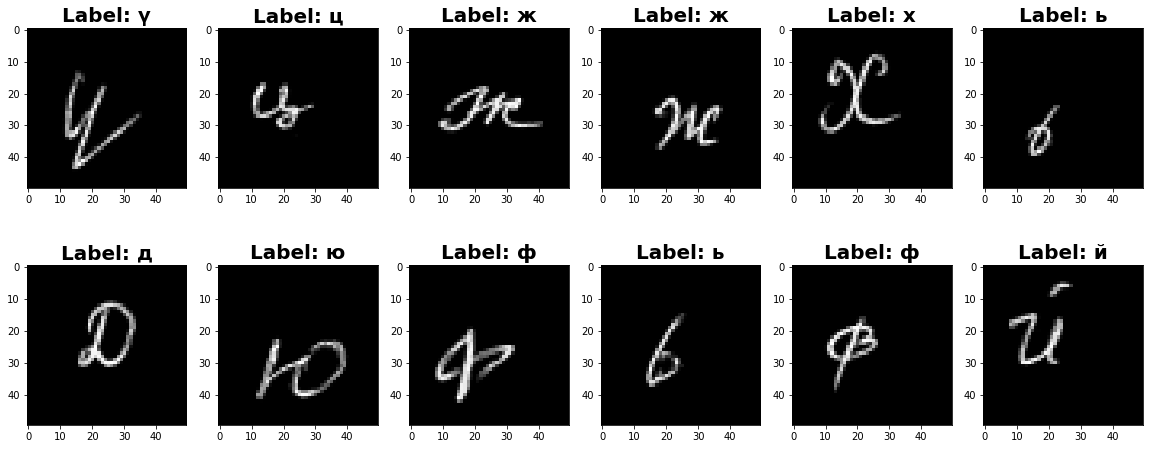

In [ ]:
# show images
image = X.reshape(X.shape[0], 50, 50) # reshaping it to plot image
plt.figure(figsize=(20,8))
j = 0
for i in range(12):
    plt.subplot(2,6,1 + j)
    num = random.randrange(0, len(Y)+1)
    plt.imshow(image[num], cmap="gray")
    plt.title('Label: '+alphabet[Y[num]], fontweight='bold', size=20)
    j += 1

In [ ]:
# normalization of data
X = X / 255

In [ ]:
# split data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
# обьявили несколько моделей
catboost_model = cb.CatBoostClassifier(iterations=100, max_depth=5, random_state=42) # CatBoost
adab_class = ensemble.AdaBoostClassifier(random_state=42)    # AdaBoost classifier
bag_class = ensemble.BaggingClassifier(random_state=42)    # Bagging classifier
rforest_class = ensemble.RandomForestClassifier(random_state=42)    # random forest classifier
gradb_class = ensemble.GradientBoostingClassifier(random_state=42)    # Gradient Boosting for classification
mlp_class = neural_network.MLPClassifier(random_state=42)    # Multi-layer Perceptron classifier

# Обучение моделей

In [ ]:
catboost_model.fit(x_train, y_train)

In [ ]:
adab_class.fit(x_train, y_train)

AdaBoostClassifier(random_state=42)

In [ ]:
bag_class.fit(x_train, y_train)

BaggingClassifier(random_state=42)

In [ ]:
rforest_class.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
mlp_class.fit(x_train, y_train)

MLPClassifier(random_state=42)

# Прогноз наших моделей

In [ ]:
y_pred_cat = catboost_model.predict(x_test)    # CatBoost Classifier
y_pred_adab = adab_class.predict(x_test)    # AdaBoost classifier
y_pred_bag = bag_class.predict(x_test)    # Bagging classifier
y_pred_rfor = rforest_class.predict(x_test)    # random forest classifier
y_pred_mlp = mlp_class.predict(x_test)    # Multi-layer Perceptron classifier

# Оценка качества модели на тестовых данных

In [ ]:
print(f'Accuracy of CatBoost: {accuracy_score(y_test, y_pred_cat)}')
print(f'Accuracy of AdaBoost: {accuracy_score(y_test, y_pred_adab)}')
print(f'Accuracy of Bagging: {accuracy_score(y_test, y_pred_bag)}')
print(f'Accuracy of RandomForest: {accuracy_score(y_test, y_pred_rfor)}')
print(f'Accuracy of Multi-layer Perceptron: {accuracy_score(y_test, y_pred_mlp)}')

In [ ]:
# лучшую оценку показал моделька RandomForest
# прогнозируем на нем тестовую выборку

test_df = test.drop(["id"], axis=1)
y_pred = rforest_class.predict(test_df)

#  # Записываем прогнозы на датафрейм(submiss) и отправляем его на  [Kaggle](https://www.kaggle.com/competitions/kyrgyz-language-hand-written-letter-recognition)

In [ ]:
# Записываем прогнозы на датафрейм(submiss) и отправляем его на Kaggle
submiss = pd.DataFrame()
submiss['id'] = test['id']
submiss['label']  = y_pred
submiss.to_csv('subbmiss_let.csv', index=False)